Single-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.0676375  148.07305629
  149.05750568]
 [  1.13578167   0.           1.04403065 ... 146.06929862 147.0756948
  148.05826556]
 [  2.06397674   1.04403065   0.         ... 145.07491168 146.08049151
  147.06284371]
 ...
 [147.0676375  146.06929862 145.07491168 ...   0.           1.17473401
    2.1       ]
 [148.07305629 147.0756948  146.08049151 ...   1.17473401   0.
    1.26095202]
 [149.05750568 148.05826556 147.06284371 ...   2.1          1.26095202
    0.        ]]

Complete-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.0676375  148.07305629
  149.05750568]
 [  1.13578167   0.           1.04403065 ... 146.06929862 147.0756948
  148.05826556]
 [  2.06397674   1.04403065   0.         ... 145.07491168 146.08049151
  147.06284371]
 ...
 [147.0676375  146.06929862 145.07491168 ...   0.           1.17473401
    2.1       ]
 [148.07305629 147.0756948  146.08049151 ...   1.17473401 

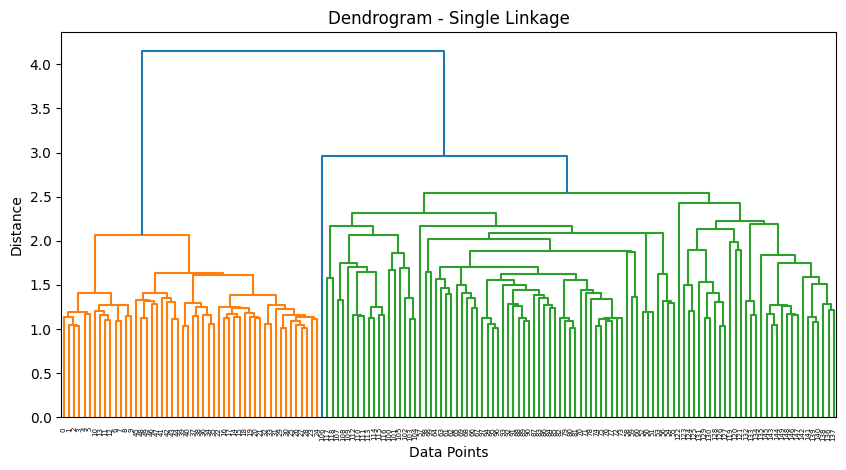

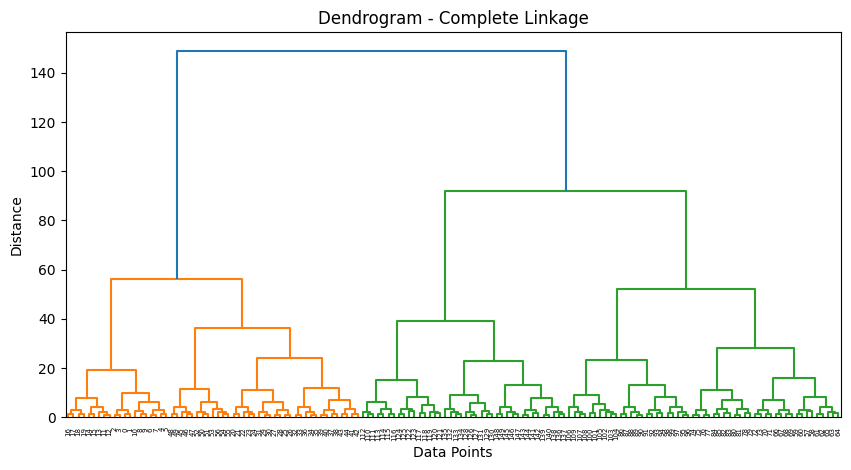

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = np.loadtxt('Iris.csv', delimiter=',', skiprows=1)

# Function to calculate the proximity matrix based on single-linkage
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Function to calculate the proximity matrix based on complete-linkage
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Calculate the proximity matrix using single-linkage
single_linkage_matrix = single_linkage(iris)
print("Single-linkage proximity matrix:\n")
print(single_linkage_matrix)

# Calculate the proximity matrix using complete-linkage
complete_linkage_matrix = complete_linkage(iris)
print("\nComplete-linkage proximity matrix:\n")
print(complete_linkage_matrix)

# Plot the dendrogram using single-linkage
linkage_matrix = linkage(iris, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram using complete-linkage
linkage_matrix = linkage(iris, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()